# Feature Expansion 
<hr style="border:2px solid black">

## 1. Introduction

### Feature expansion: what & why?

- Increases the number of features by deriving new features from existing ones
- May help building a more powerful model
- Example of a more generic technique: *feature engineering*

### Feature engineering techniques

 |       technique      |                                        usefulness                                |
 |:--------------------:|:--------------------------------------------------------------------------------:|
 |     `Imputation`     |                    fills out missing values in data                    |
 |   `Discretization`   |                groups a feature in some logical fashion into bins                |
 |`Categorical Encoding`|encodes categorical features into numerical values|
 |  `Feature Splitting` |splits a feature into parts|
 |   `Outlier Handling` |takes care of unusually high/low values in the dataset|
 | `Log Transformation` |deals with ill-behaved (skewed of heteroscedastic) data       |
 |   `Feature Scaling`  |handles the sensitivity of ML algorithms to the scale of input values| 
 | `RBF Transformation` |uses a continuous distribution to encode ordinal features|

<hr style="border:2px solid black">

## 2. Limitation of Linear Terms

**Load packages**

In [2]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

**Load Anscombe's quartet**

In [3]:
df = sns.load_dataset('anscombe')

**Quick exploration**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [5]:
df['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

**Summary statistics**

In [6]:
# dataset groupby object
groups = df.groupby(by='dataset')

# summary statistics empty dataframe
summary_stat = pd.DataFrame()

# mean and variance
summary_stat['x_mean'] = groups['x'].mean()
summary_stat['x_var']  = groups['x'].var()
summary_stat['y_mean'] = groups['y'].mean()
summary_stat['y_var']  = groups['y'].var()

# Pearson correlation
from scipy.stats import pearsonr

summary_stat['corr_xy'] = groups.apply(
    lambda g: pearsonr(g['x'],g['y'])[0]
)

In [7]:
summary_stat

,x_mean,x_var,y_mean,y_var,corr_xy
dataset,,,,,
I,9.0,11.0,7.500909,4.127269,0.816421
II,9.0,11.0,7.500909,4.127629,0.816237
III,9.0,11.0,7.500000,4.122620,0.816287
IV,9.0,11.0,7.500909,4.123249,0.816521


**Linear Models**

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# slope of linear model
summary_stat['slope'] = groups.apply(
    lambda g: model.fit(
        g[['x']], g['y']
    ).coef_[0]
)

# intercept of linear model
summary_stat['intercept'] = groups.apply(
    lambda g: model.fit(
        g[['x']], g['y']
    ).intercept_
)

# mean squared error
from sklearn.metrics import mean_squared_error

summary_stat['mse'] = groups.apply(
    lambda g: mean_squared_error(
        g['y'],
        model.fit(
            g[['x']], g['y']
        ).predict(g[['x']])
    )
)

In [9]:
summary_stat

,x_mean,x_var,y_mean,y_var,corr_xy,slope,intercept,mse
dataset,,,,,,,,
I,9.0,11.0,7.500909,4.127269,0.816421,0.500091,3.000091,1.251154
II,9.0,11.0,7.500909,4.127629,0.816237,0.500000,3.000909,1.252390
III,9.0,11.0,7.500000,4.122620,0.816287,0.499727,3.002455,1.250563
IV,9.0,11.0,7.500909,4.123249,0.816521,0.499909,3.001727,1.249317


**Goodness of lineat fit**

In [10]:
# coefficient of determination
summary_stat['R²'] = groups.apply(
    lambda g: model.score(
        g[['x']], g['y']
    )
)

In [11]:
summary_stat

,x_mean,x_var,y_mean,y_var,corr_xy,slope,intercept,mse,R²
dataset,,,,,,,,,
I,9.0,11.0,7.500909,4.127269,0.816421,0.500091,3.000091,1.251154,0.666542
II,9.0,11.0,7.500909,4.127629,0.816237,0.500000,3.000909,1.252390,0.666242
III,9.0,11.0,7.500000,4.122620,0.816287,0.499727,3.002455,1.250563,0.666324
IV,9.0,11.0,7.500909,4.123249,0.816521,0.499909,3.001727,1.249317,0.666707


**Linear model plots**

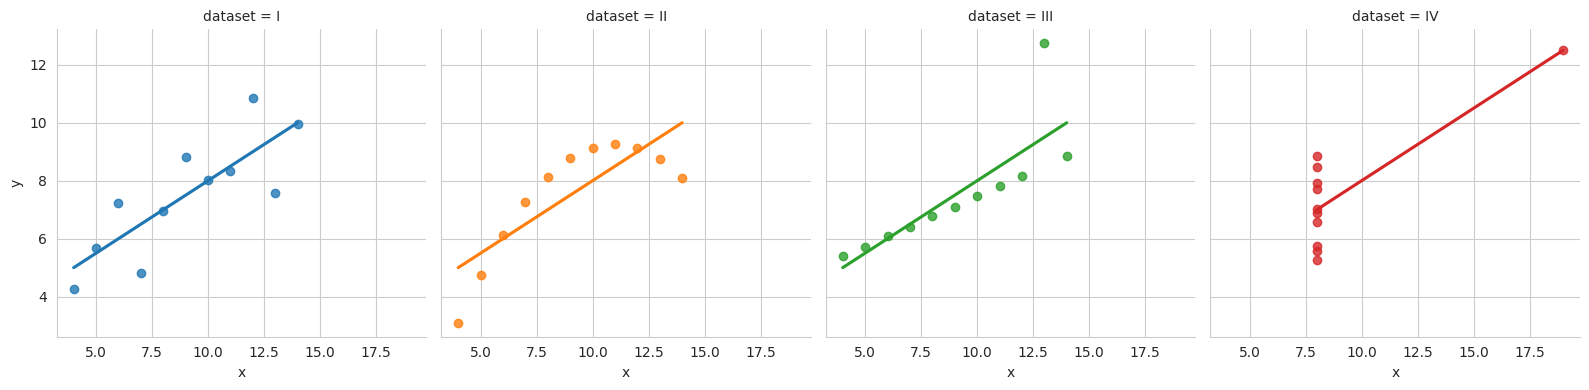

In [12]:
sns.lmplot(
    data = df, 
    x = 'x', 
    y = 'y', 
    col = 'dataset', 
    hue = 'dataset',
    ci=None, 
    height=4
);

***Q: How could the models be improved?***

- In reality, only linear dependencies are rather rare (underfitting)
- Non-linear relationships can be modelled by expansion of features
- Any real function can be approximated with suitable polynomial terms 

<hr style="border:2px solid black">

## 3. Polynomial Terms

- Additional features obtained by an existing feature to some power
- For some feature x, consider the model: 

$$
y = a_0 + a_1x + a_2x^2 +\ldots+\epsilon
$$

- Likely increase of model accuracy, but increased risk of overfitting

**Dataset II**

In [13]:
dfII = df[df['dataset']=='II']
dfII.drop('dataset',axis=1,inplace=True)
dfII = dfII.reset_index(drop=True)
dfII.head()

,x,y
0,10.0,9.14
1,8.0,8.14
2,13.0,8.74
3,9.0,8.77
4,11.0,9.26


**Initial feature & target**

In [14]:
X,y = dfII[['x']], dfII['y']

**Add quadratic feature**

In [15]:
X['x²'] = X['x']**2

In [16]:
X.head()

,x,x²
0,10.0,100.0
1,8.0,64.0
2,13.0,169.0
3,9.0,81.0
4,11.0,121.0


**Regression model**

In [17]:
# fit model
model.fit(X,y);

In [18]:
# model coefficients
a0 = model.intercept_
a1,a2 = model.coef_

print(
    f'intercept: {a0}\n'
    f'coef of x: {a1}\n'
    f'coef of x²: {a2}'
)

intercept: -5.995734265734267
coef of x: 2.780839160839161
coef of x²: -0.12671328671328672


**Plot data vs model**

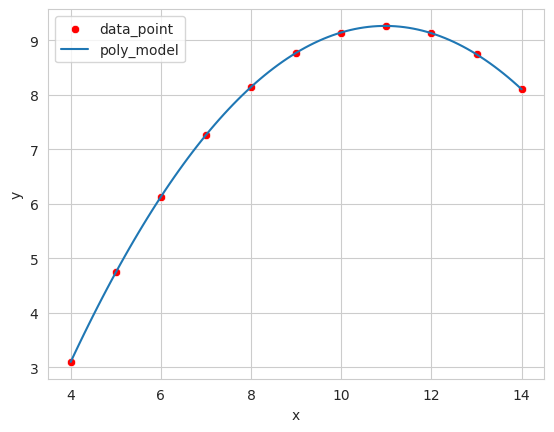

In [19]:
sns.scatterplot( 
    x = 'x', 
    y = 'y', 
    data = dfII,
    label = 'data_point',
    color ='r'
);


x_lin = np.linspace(dfII['x'].min(),dfII['x'].max(),101)
y_lin = np.array([a0 + a1*x + a2*x**2 for x in x_lin])

sns.lineplot(
    x = x_lin,
    y = y_lin,
    label = 'poly_model'
);

**Model evaluation**

In [20]:
# coefficient of determination
model.score(X,y)

0.999999457857722

In [21]:
# mean squared error
mean_squared_error(
    y_true = y,
    y_pred = model.fit(X,y).predict(X)
)

2.0343293070570407e-06

### Sklearn [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

**Initial feature & target**

In [22]:
X,y = dfII[['x']], dfII['y']

**Create polynomial features with specified degree**

In [23]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(
    degree = 3,
    interaction_only = False,
    include_bias = True
)

features = pf.fit_transform(X)

In [24]:
features

array([[1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 1.300e+01, 1.690e+02, 2.197e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.400e+01, 1.960e+02, 2.744e+03],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 1.200e+01, 1.440e+02, 1.728e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02]])

In [25]:
# features
pd.DataFrame(features,columns=['1','x','x²','x³']).head()

,1,x,x²,x³
0,1.0,10.0,100.0,1000.0
1,1.0,8.0,64.0,512.0
2,1.0,13.0,169.0,2197.0
3,1.0,9.0,81.0,729.0
4,1.0,11.0,121.0,1331.0


**Model building with pipeline**

In [26]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

In [36]:
pipeline.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [37]:
pipeline.score(X, y)

0.999999457857722

<hr style="border:2px solid black">

## 4. Interaction Terms

- For multiple initial features, there could be *interactions* (cross-polynomial terms)
- For 2 features, $x_0$ and $x_1$ for example, a 2nd-degree polynomial may contain:

$$
1,~x_0,~x_1,~x_0^2,~x_0x_1,~x_1^2
$$

- Each of the terms get their own coefficient in a regression model
- Polynomial preprocessing function with `interaction_only = True`

### Exercise

1. Read the `interactions.csv` file
2. Find the correlation between any of the independent variables (processing time, temperature, pressure) and the dependent variable (strength)
3. Include `temperature*pressure` as an interaction effect, and compute it's correlation with the target

<hr style="border:2px solid black">

## References

- [8 Feature Engineering Techniques for Machine Learning](https://www.projectpro.io/article/8-feature-engineering-techniques-for-machine-learning/423)

- [Fundamental Techniques of Feature Engineering for Machine Learning](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)

- [Understanding Interaction Effects in Statistics](https://statisticsbyjim.com/regression/interaction-effects/)